<a href="https://colab.research.google.com/github/bcesgim/opendata/blob/eventos/sorteos/BDWBA/sorteo_de_entradas_para_el_BDWA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Antes de empezar el sorteo quisieramos agradecerles por participar y al equipo de la Big Data Week Buenos Aires por incentivarnos a realizarlo desde nuestro lugar como sponsor

Saving BDWBA.png to BDWBA.png


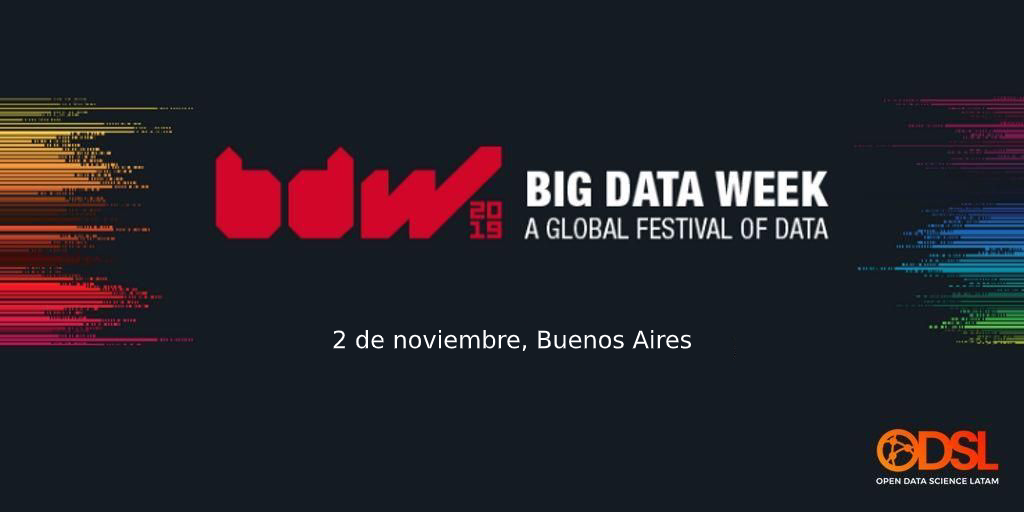

In [1]:
from google.colab import files
from IPython.display import Image 
uploaded = files.upload()
Image('BDWBA.png', width=600)

Largamos! Para el sorteo vamos a usar la planilla con la lista de participantes accesible desde nuestro Drive. 

Google colab nos facilita esto al dejarnos montar nuestro Drive a través de Google Drive File Stream, lo que si nos pide autenticarnos a través de un código que nos va a aparecer en la URL que nos devuelve mount(). En https://bit.ly/2r7apkV pueden informarse un poco más acerca de los posibles riesgos de trabajar de esta forma


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive



Usamos la librería open-source gspread para interactuar con Google Sheets 

In [0]:
!pip install --upgrade --quiet gspread

Importamos la librería y nos volvemos a autenticar para acceder al archivo desde el SDK de Google Cloud. Para más info pueden chusmear en 
https://gspread.readthedocs.io/en/latest/oauth2.html#oauth-credentials y https://developers.google.com/identity/protocols/OAuth2

In [0]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

Ahora si, ya podemos acceder a nuestra planilla. De paso verificamos que tenga los datos que nos interesan 
;) 

In [5]:
planilla = gc.open('Listado de participantes para sorteo entradas BDWBA').sheet1
filas = planilla.get_all_values()
print(filas)

[['Nombres', 'Apellido', 'Ocupacion', 'Red donde participo'], ['Jorge ', 'Peñaranda', 'Jr. Data Engineer', 'Linkedin'], ['Ramiro ', 'Roman', 'Director Treza', 'Linkedin'], ['Santiago ', 'Candia', 'Data Scientist', 'Linkedin'], ['Jorge ', 'Carcavallo', 'Idealizer', 'Linkedin'], ['Micaela ', 'Turrin', 'Jr. Data Analyst', 'Linkedin'], ['Carolina ', 'Bonini', 'SQL Developer', 'Linkedin'], ['Maria Fernanda', 'Caicedo', 'Sr. Product Owner', 'Linkedin'], ['Karen ', 'Echavarria', 'Psicologa', 'Linkedin'], ['Cesar ', 'Bonilla', 'Data Scientist', 'Linkedin'], ['Franchesca', 'Carrasco', 'Marketing Analyst', 'Linkedin'], ['Juan Manuel', 'Creado', 'Gestion de Proyectos', 'Linkedin'], ['Ana ', 'Fernandez', 'Lic. Economia', 'Linkedin'], ['Ezequiel ', 'Martín', 'Technical Account Manager', 'Linkedin'], ['Lissette', 'Bolinaga', 'Lic. Economia', 'Linkedin'], ['Cintia', 'Callamullo', 'Estudiante Datos', 'Linkedin'], ['Alejandro', 'Chazarreta', 'Recruiter IT', 'Linkedin'], ['Fernando ', 'Arce', 'Recruiter

Importamos a la buena y vieja librería de Pandas que tanto queremos, cargamos la data en un dataframe y volvemos a revisarla


In [6]:
import pandas as pd
sorteo = pd.DataFrame.from_records(filas)
sorteo

,0,1,2,3
0,Nombres,Apellido,Ocupacion,Red donde participo
1,Jorge,Peñaranda,Jr. Data Engineer,Linkedin
2,Ramiro,Roman,Director Treza,Linkedin
3,Santiago,Candia,Data Scientist,Linkedin
4,Jorge,Carcavallo,Idealizer,Linkedin
5,Micaela,Turrin,Jr. Data Analyst,Linkedin
6,Carolina,Bonini,SQL Developer,Linkedin
7,Maria Fernanda,Caicedo,Sr. Product Owner,Linkedin
8,Karen,Echavarria,Psicologa,Linkedin
9,Cesar,Bonilla,Data Scientist,Linkedin


Se ve un poco rara porque aún no seteamos los headers, veamos una forma de hacerlo

In [7]:
headers = sorteo.iloc[0]
new_df  = pd.DataFrame(sorteo.values[1:], columns=headers)
new_df

,Nombres,Apellido,Ocupacion,Red donde participo
0,Jorge,Peñaranda,Jr. Data Engineer,Linkedin
1,Ramiro,Roman,Director Treza,Linkedin
2,Santiago,Candia,Data Scientist,Linkedin
3,Jorge,Carcavallo,Idealizer,Linkedin
4,Micaela,Turrin,Jr. Data Analyst,Linkedin
5,Carolina,Bonini,SQL Developer,Linkedin
6,Maria Fernanda,Caicedo,Sr. Product Owner,Linkedin
7,Karen,Echavarria,Psicologa,Linkedin
8,Cesar,Bonilla,Data Scientist,Linkedin
9,Franchesca,Carrasco,Marketing Analyst,Linkedin


Mucho mejor! (no se percaten del comentario en la fila 38, 3er columna jaja)

Ahora agrupamos a los nombres y a los apellidos para tener el nombre completo de cada participante y estar un paso más cerca de conocer a los flamantes ganadores! 

In [8]:
participantes = sorteo.iloc[1:,0].str.cat(sorteo.iloc[1:,1], sep=" ")
casi_estamos = pd.Series(participantes, name = 'Participantes').to_frame()
casi_estamos.head()

,Participantes
1,Jorge Peñaranda
2,Ramiro Roman
3,Santiago Candia
4,Jorge Carcavallo
5,Micaela Turrin


Y ahora.. el momento de la verdad! 

Para esto usamos el método sample() de pandas:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html

y seteamos una semilla para el generador de valores aleatorios

In [9]:
import random

valor_aleatorio = random.randint(1, 10)
ganadores = participantes.sample(n=2, random_state = valor_aleatorio)
print("Los ganadores son: {0} y {1}! Muchas felicidades!".format(str(ganadores.iloc[0]),str(ganadores.iloc[1])))

Los ganadores son: Santiago  Hernandez y Sergio  Fermanelli! Muchas felicidades!
